In [1]:
!pip install -q git+https://github.com/phatvucoder/pdatakit.git
!pip -q install gdown
!sudo apt-get update & sudo apt-get install unzip

Get:1 https://packages.cloud.google.com/apt gcsfuse-focal InRelease [1227 B]
Get:2 https://packages.cloud.google.com/apt cloud-sdk InRelease [1618 B]       
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1581 B]
Hit:4 https://packages.cloud.google.com/apt google-fast-socket InRelease       
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease              
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 https://packages.cloud.google.com/apt gcsfuse-focal/main amd64 Packages [28.6 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]        
Get:9 https://packages.cloud.google.com/apt cloud-sdk/main all Packages [1582 kB]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1172 kB]
Get:11 https://packages.cloud.google.com/apt cloud-sdk/main amd64 Packages [3428 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]     
Ge

In [2]:
!gdown 1D1YYc2nxpifm9tLqH8v9jxMvZtjtwFuZ
!unzip -q obj_bkgr -d dataset
!rm -rf ./dataset/__MACOSX

Downloading...
From (original): https://drive.google.com/uc?id=1D1YYc2nxpifm9tLqH8v9jxMvZtjtwFuZ
From (redirected): https://drive.google.com/uc?id=1D1YYc2nxpifm9tLqH8v9jxMvZtjtwFuZ&confirm=t&uuid=20c6fa7c-52ce-4152-997d-f35991c518b6
To: /kaggle/working/obj_bkgr.zip
100%|██████████████████████████████████████| 1.54G/1.54G [00:18<00:00, 82.2MB/s]


In [3]:
from pdatakit.pod.data_processor import DataProcessor
from pdatakit.pod.data_formatter import FormatType
import shutil

In [4]:
# shutil.copytree('/kaggle/input/bkai2024', '/kaggle/working/bkai2024')

In [5]:
processor = DataProcessor(
    data_root='./dataset/daytime',
    image_extension='jpg',
    label_extension='txt',
    train_size=0.7,
    val_size=0.2,
    test_size=0.1,
    random_state=42
)

In [6]:
for i in range(4, 8):
    processor.process_labels(i, i-4)

Replacing '4' with '0' in label files...
Label replacement completed. Processed 6891 files, modified 0 files.
Replacing '5' with '1' in label files...
Label replacement completed. Processed 6891 files, modified 0 files.
Replacing '6' with '2' in label files...
Label replacement completed. Processed 6891 files, modified 0 files.
Replacing '7' with '3' in label files...
Label replacement completed. Processed 6891 files, modified 0 files.


In [7]:
processor.split_data()

Data splitting completed.
Training samples: 4831
Validation samples: 1388
Testing samples: 672


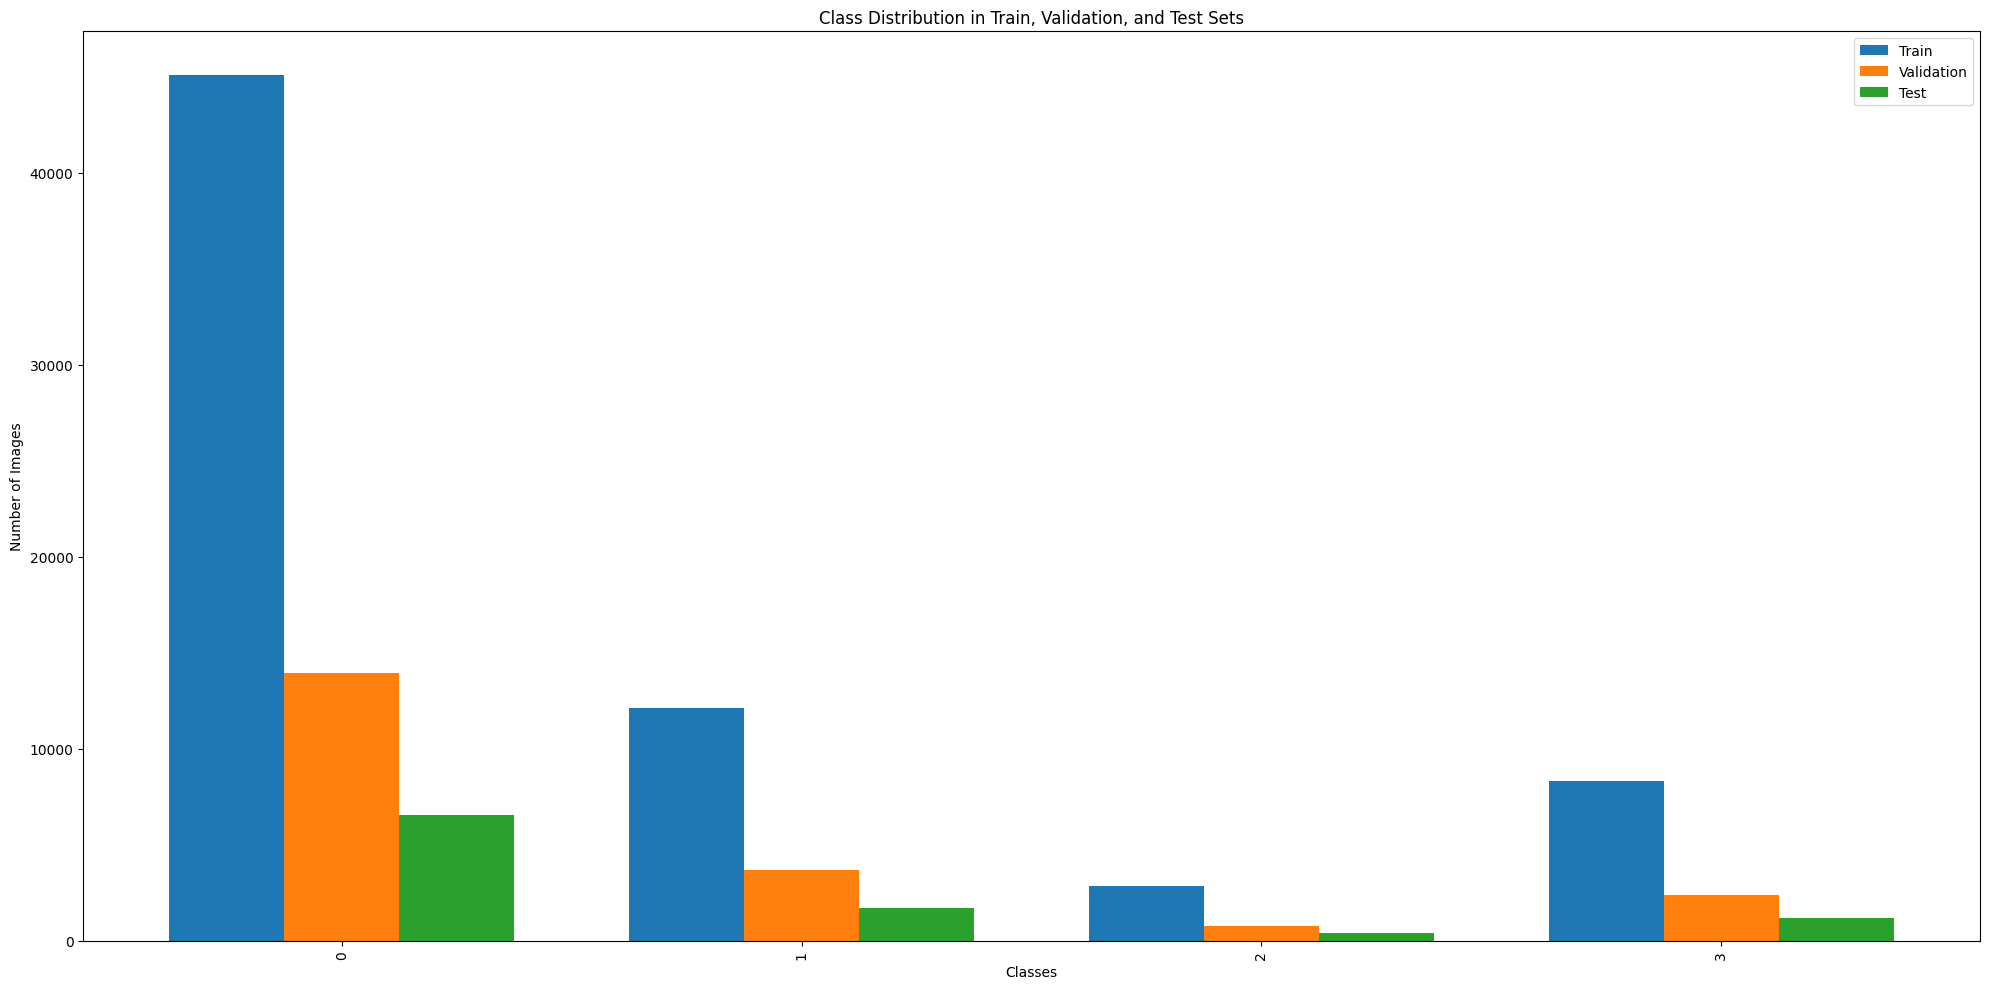

In [8]:
processor.visualize_distributions()

In [9]:
class_mapping = {
    0: 'motorbike',
    1: 'car',
    2: 'bus',
    3: 'truck'
}

# Format the data into YOLO New format and save to 'formatted_data' directory
processor.format_data(
    output_dir='./yolo_data',
    format_type=FormatType.YOLO_NEW,
    class_mapping=class_mapping
)

Creating YOLO New format...
Created data.yaml at yolo_data/data.yaml
YOLO New format created successfully.
Data formatted into yolo_new format and saved to ./yolo_data.


In [10]:
processor.summary()

===== Data Manager Summary =====
Data Root: ./dataset/daytime
Image Extension: jpg
Label Extension: txt
Total Images: 6891
Total Labels: 6891
Training Samples: 4831
Validation Samples: 1388
Testing Samples: 672
Class Distribution in Training Set:
  0: 45111
  1: 12148
  2: 2855
  3: 8299
Class Distribution in Validation Set:
  0: 13941
  1: 3697
  2: 784
  3: 2396
Class Distribution in Testing Set:
  0: 6554
  1: 1709
  2: 396
  3: 1178


In [11]:
import numpy as np

class_distribution = processor.splitter.get_class_distribution()
total_samples_per_class = np.sum(class_distribution, axis=0)
total_samples = np.sum(total_samples_per_class)
class_weights = total_samples / total_samples_per_class
class_weights

array([ 1.51004481,  5.64361399, 24.55216853,  8.34397372])

In [12]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.36 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5933.9/8062.4 GB disk)


In [13]:
!yolo train data=/kaggle/working/yolo_data/data.yaml model=yolo11n.pt lr0=0.0001 epochs=200 batch=128 device=0,1 cache=ram

100%|██████████████████████████████████████| 5.35M/5.35M [00:00<00:00, 74.6MB/s]
Ultralytics 8.3.36 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
                                                 CUDA:1 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/kaggle/working/yolo_data/data.yaml, epochs=200, time=None, patience=100, batch=128, imgsz=640, save=True, save_period=-1, cache=ram, device=(0, 1), workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=

In [14]:
import shutil
shutil.copy('/kaggle/working/runs/detect/train/weights/best.pt', '/kaggle/working/day.pt')

from IPython.display import FileLink
FileLink(r'day.pt')

/kaggle/working/day.pt